In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import doctest
import copy

In [3]:
#https://stackoverflow.com/questions/40137950/possible-to-run-python-doctest-on-a-jupyter-cell-function
def test(func):
    '''
    Use test as a decorator to a function with doctests in Jupyter notebook. 
    Run the cell to see the results of the doctests.
    '''
    globs = copy.copy(globals())
    globs.update({func.__name__:func})
    doctest.run_docstring_examples(func, globs, verbose=True, name=func.__name__)
    return func

### Simulate straight line and circular movements with Bicycle model

Robot is at the origin (0, 0) and facing North, i.e, $\theta = \pi/2$. Assume the wheelbase of the vehicle $L$ = 0.9 m

In [6]:

#uncomment this decorator to test your code
#@test 
def bicycle_model(curr_pose, v, delta, dt=0.1):
    '''
    >>> bicycle_model((0.0,0.0,0.0), 1.0, 0.0)
    (1.0, 0.0, 0.0)
    >>> bicycle_model((0.0,0.0,0.0), 0.0, np.pi/4)
    (0.0, 0.0, 1.0)
    >>> bicycle_model((0.0, 0.0, 0.0), 1.0, np.pi/4)
    (1.0, 0.0, 1.0)
    '''
     
    x = curr_pose[0] + v*np.cos(curr_pose[2])*dt
    y = curr_pose[1] + v*np.sin(curr_pose[2])*dt
    theta = curr_pose[2] + v*np.tan(delta)*dt/0.9
    ## write code to calculate next_pose
    # refer to the kinematic equations of a bicycle model
    # x =
    # y = 
    # theta = 
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))
    # return calculated (x, y, theta)
    return x,y,theta

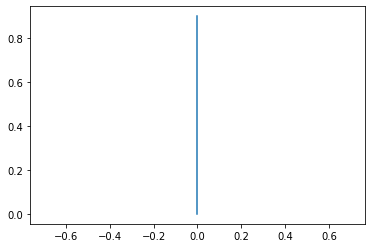

In [ ]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10
#fill in v and omega values
#v =
v = np.ones(steps)
#delta = 
delta = np.zeros(steps)
for _ in range(steps):
   #instruction to take v, delta and compute new pose    
    straight_trajectory.append(pose)
    pose = bicycle_model(pose, v[_], delta[_]) 
   # store new pose
straight_trajectory = np.array(straight_trajectory)   
    
   # store new pose
### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(straight_trajectory[:,0],straight_trajectory[:,1])

    

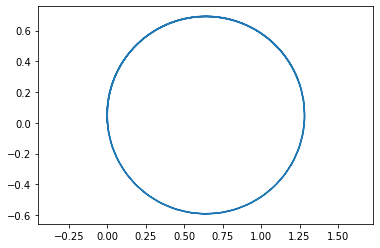

In [ ]:
#circle
circle_trajectory = []
pose = (0, 0, np.pi/2)
steps = 100
#fill in v and omega values
#v = 
#w = 
v = 0.1*np.ones(steps)
delta = -np.ones(steps)
for _ in range(steps):
    #instruction to take v, delta and compute new pose    
    circle_trajectory.append(pose)
    pose = bicycle_model(pose, v[_], delta[_]) 
   # store new pose
circle_trajectory = np.array(circle_trajectory) 

plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(circle_trajectory[:,0],circle_trajectory[:,1])

   


In [ ]:
### Plot straight and circular trajectories
plt.figure()
plt.plot()


### Simulate Bicycle model with Open Loop control

We want the robot to follow these instructions

**straight 10m, right turn, straight 5m, left turn, straight 8m, right turn**

It is in open loop; control commands have to be calculated upfront. How do we do it?

To keep things simple in the first iteration, we can fix $v = v_c$ and change only $\delta$. To make it even simpler, $\delta$ can take only 2 values 
+ 0 when the vehicle is going straight 
+ $\delta = \delta_c$ when turning

This leaves only 2 questions to be answered
* What should be $v_c$ and $\delta_c$?
* When should $\delta$ change from 0 and back?

In [ ]:
v_c = 0.9*np.pi/12 # m/s
delta_c = np.pi/6# rad/s
L = 0.9 #metres
v_fast = 1 # m/s
#calculate time taken to finish a quarter turn (pi/4)
# unlike you would need to take into account v_c and L of the vehicle as well
#t_turn = 
t_turn =  int(((np.pi/2)*(L)/v_c/delta_c)+(0.9/v_c))

#calculate the time taken to finish straight segments
# omega array is to be padded with equivalent zeros

#t_straight1, t_straight_2, t_straight3 = 
t_straight1, t_straight2, t_straight3 = 10,5,8

all_delta = [0]*t_straight1 + [delta_c]*t_turn + \
        [0]*t_straight2 + [delta_c]*t_turn + \
        [0]*t_straight3 + [-delta_c]*t_turn
all_v = v_fast*np.ones_like(all_delta)
print(all_delta,all_v)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0, 0, 0, 0, 0, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0, 0, 0, 0, 0, 0, 0, 0, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988] [1. 1. 1. 1. 1.

Let us make a cool function out of this!

Take in as input a generic route and convert it into open-loop commands

Input format: [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]

Output: all_v, all_delta

In [ ]:
#route input format [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
def get_open_loop_commands(route, vc, deltac):
    L = 0.9 #metres
    t_turn =  int(((np.pi/2)*(L)/v_c/deltac)+(0.9/vc))
    #t_turn = int((np.pi/2)*(L)/vc) #seconds
    all_delta = []
    deltas = {"straight":0, "left": deltac, "right":-deltac}
  #calculate time taken to finish a quarter turn (pi/2)
    for manoeuvre,command in route:
        u = int(command/vc)
        v = int(np.deg2rad(command)*L/vc/np.tan(deltac))
        t_cmd = u if manoeuvre == 'straight' else v
        all_delta += [deltas[manoeuvre]]*t_cmd
    all_v = vc*np.ones_like(all_delta)
    
    return all_v, all_delta

### Unit test your function with the following inputs

+ [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
+ $v_c = 1$
+ $delta_c = \pi/12$

In [ ]:
#get_open_loop_commands()
get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],1,np.pi/12)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]),
 [0,
  0,
  0,
  0,
  0,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  0,
  0,
  0,
  0,
  0,
  0,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494])

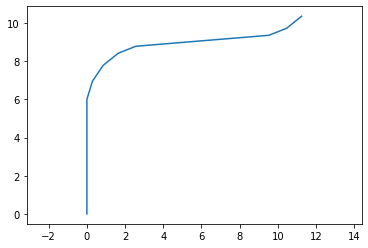

In [ ]:
robot_trajectory = []
pose = np.array([0, 0, np.pi/2])
all_v, all_delta = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],1,np.pi/12)
for v, delta in zip(all_v, all_delta):
    #instruction to take v, delta and compute new pose
    robot_trajectory.append(pose) 
    pose = bicycle_model(pose,v,delta,1.0)   
   # store new pose
robot_trajectory = np.array(robot_trajectory)   

plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(robot_trajectory[:,0],robot_trajectory[:,1])    

   # store new pose

In [ ]:
# plot robot trajectory
plt.figure()
plt.grid()
#plt.plot( )

#show first and last robot positions with + markers
# example: plt.plot(0, 0, 'r+', ms=10)


### Shape the turn
Let us try something cooler than before (though a bit tricky in open loop). Instead of boring circular arcs, change the steering angle so that the robot orientation changes as shown in the equation below

$\theta = (\theta_i - \theta_f) * (1 - 3x^2 + 2x^3) + \theta_f  \thinspace \vee x \in [0,1]$

First let us plot this

In [ ]:
def poly_turn(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    return (theta_i-theta_f) * (1 - 3 * x * x + 2 * (x**3)) + theta_f

How does a right turn look? 

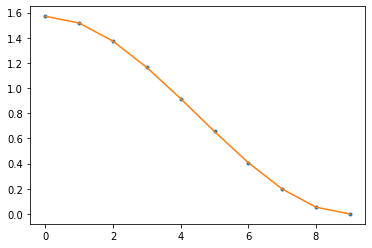

In [ ]:
plt.figure()
plt.plot(poly_turn(np.pi/2, 0),'.')
plt.plot(poly_turn(np.pi/2, 0))

Now plot a left turn (North to East)

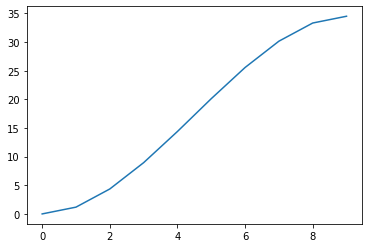

In [ ]:
plt.figure()
plt.plot(poly_turn(0,np.pi/2))
#plt.plot(poly_turn())

How does $\theta$ change when we had constant $\delta$? Plot it

Text(0, 0.5, 'theta')

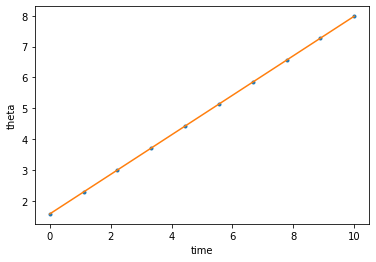

In [10]:
from scipy.integrate import odeint
v = 1
delta = np.pi/6 # constant
L = 0.9
def plot_theta(theta, t):
    theta_dot = (v*np.tan(delta)/L)
    return theta_dot

t=np.linspace(0,10,10)

thetai = np.pi/2

y = odeint(plot_theta, thetai, t)

plt.plot(t,y,'.')
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('theta')




We know the rate of change of $\theta$ is proportional to $\delta$. Can you work out the sequence of $\delta$ to change $\theta$ as in the cubic polynomial shown above?

In [ ]:
v = 1
L = 0.9
theta_dot = np.diff(poly_turn(np.pi/2, 0))
delta = np.arctan(theta_dot*L/v)
print(delta)

[-0.04844344 -0.12920623 -0.18593495 -0.21942362 -0.23048008 -0.21942362
 -0.18593495 -0.12920623 -0.04844344]
